In [1]:
import pandas as pd
import sys
sys.path.append("C:\\Users\\a6r1a\\Desktop\\LogsPrinting\\src")# db_oracle path, in widows use "\\"
from db_oracle import DB


In [2]:
CONN_INFO = {
    'host': '127.0.0.1',
    'port': 1521,
    'user': 'sys',
    'pass': 'manager',
    'service':'GO'
}
CONN_STR = '{user}/{pass}@{host}:{port}/{service}'.format(**CONN_INFO)
CONN_STR

'sys/manager@127.0.0.1:1521/GO'

In [3]:
db = DB(CONN_STR)

In [24]:
pd.DataFrame.from_dict(db.exec_dml('''select owner, table_name, tablespace_name from dba_tables
                                                where owner in (select username from dba_users 
                                                        where username <> 'OUTLN' 
                                                        and username <> 'DIP'
                                                        and username <> 'ORACLE_OCM'
                                                        and username <> 'APPQOSSYS'
                                                        and username <> 'DBSNMP'
                                                        and username <> 'SYS'
                                                        and username <> 'SYSTEM')
'''))

,OWNER,TABLESPACE_NAME,TABLE_NAME
0,USER1,TS1,T1
1,USER4,TS4,T4
2,USER5,TS5,T5
3,USER2,TS2,T2
4,USER3,TS3,T3


In [22]:
df = pd.DataFrame.from_dict(
    db.exec_dml('''select * from logminerFiltered 
                    where username <> 'UNKNOWN' 
                    and username <> 'SYSTEM'
                    and username <> 'SYS' 
                    and table_space <> 'None' 
                    and table_space <> 'UNKNOWN' 
                    and table_name <> 'None'
                    and seg_owner <>  'SYS' '''))

In [17]:
df.shape #dimenciones de la tabla, (rows,cols)

(34613, 9)

In [7]:
pd.set_option('display.max_colwidth', -1)#permite mostrar todo el contenido de la columna, en vez de ...

In [8]:
df.head(3)

,DATE_,OPERATION,SEG_OWNER,SQL_,SQL_1,TABLE_NAME,TABLE_SPACE,TIME_,USERNAME
0,04/11/18,INSERT,USER1,"insert into ""USER1"".""T1""(""A"",""B"",""C"") values ('1','1','Hola soy u1');","delete from ""USER1"".""T1"" where ""A"" = '1' and ""B"" = '1' and ""C"" = 'Hola soy u1' and ROWID = 'AAADL9AAEAAAACbAAt';",T1,TS1,9:19:118,USER1
1,04/11/18,INSERT,USER1,"insert into ""USER1"".""T1""(""A"",""B"",""C"") values ('1','2','Adios tprueba1');","delete from ""USER1"".""T1"" where ""A"" = '1' and ""B"" = '2' and ""C"" = 'Adios tprueba1' and ROWID = 'AAADL9AAEAAAACbAAu';",T1,TS1,9:19:118,USER1
2,04/11/18,INSERT,USER1,"insert into ""USER1"".""T1""(""A"",""B"",""C"") values ('2','1','Adios tprueba1');","delete from ""USER1"".""T1"" where ""A"" = '2' and ""B"" = '1' and ""C"" = 'Adios tprueba1' and ROWID = 'AAADL9AAEAAAACbAAv';",T1,TS1,9:19:118,USER1


In [9]:
df.loc[df['OPERATION'].isin(['DELETE']) & df['TABLE_NAME'].isin(['T3'])].head(3)

,DATE_,OPERATION,SEG_OWNER,SQL_,SQL_1,TABLE_NAME,TABLE_SPACE,TIME_,USERNAME
653,05/11/18,DELETE,USER3,"delete from ""USER3"".""T3"" where ""A"" = '54' and ""B"" = '2' and ""C"" = 'Adios t3' and ROWID = 'AAADMIAAHAAAACDAAD';","insert into ""USER3"".""T3""(""A"",""B"",""C"") values ('54','2','Adios t3');",T3,TS3,6:18:115,USER3
654,05/11/18,DELETE,USER3,"delete from ""USER3"".""T3"" where ""A"" = '54' and ""B"" = '2' and ""C"" = 'Adios t3' and ROWID = 'AAADMIAAHAAAACDAAE';","insert into ""USER3"".""T3""(""A"",""B"",""C"") values ('54','2','Adios t3');",T3,TS3,6:18:115,USER3
655,05/11/18,DELETE,USER3,"delete from ""USER3"".""T3"" where ""A"" = '54' and ""B"" = '2' and ""C"" = 'Adios t3' and ROWID = 'AAADMIAAHAAAACDAAF';","insert into ""USER3"".""T3""(""A"",""B"",""C"") values ('54','2','Adios t3');",T3,TS3,6:18:115,USER3


Text(0,0.5,'TRANSACTIONS')

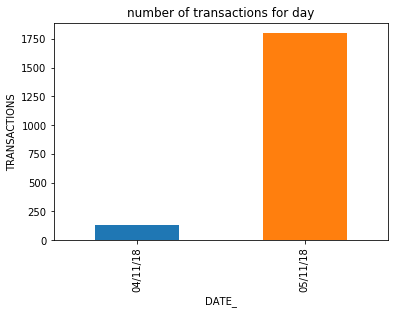

In [10]:
%matplotlib inline
df.groupby(['DATE_'])['DATE_'].count().plot(kind="bar",title="number of transactions for day").set_ylabel("TRANSACTIONS")

Text(0,0.5,'TRANSACTIONS')

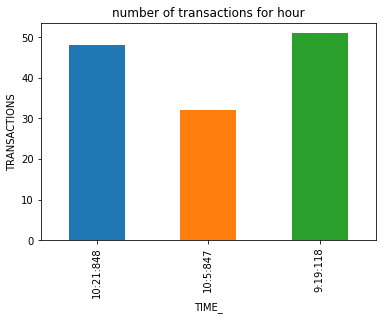

In [11]:
%matplotlib inline
dt = df.loc[df['DATE_'].isin(['04/11/18'])]
dt.groupby(['TIME_'])['TIME_'].count().plot(kind="bar", title="number of transactions for hour").set_ylabel("TRANSACTIONS")

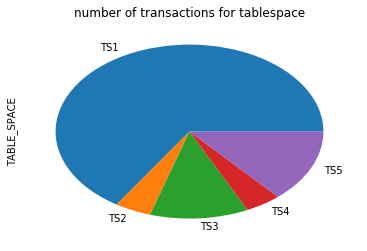

In [23]:
%matplotlib inline
df.groupby(['TABLE_SPACE'])['TABLE_SPACE'].count().plot(kind="pie", title="number of transactions for tablespace")

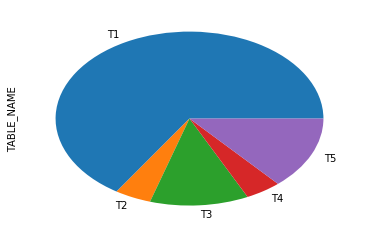

In [13]:
%matplotlib inline
df.groupby(['TABLE_NAME'])['TABLE_NAME'].count().plot(kind="pie", x="TABLE_NAME")

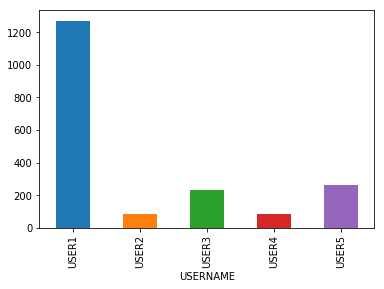

In [14]:
df.groupby(['USERNAME'])['USERNAME'].count().plot(kind="bar", x="USERNAME")

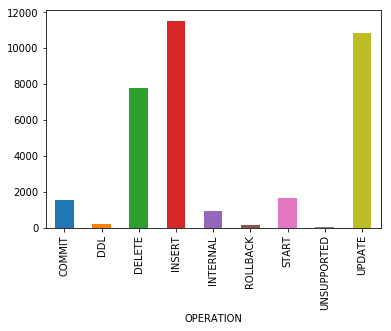

In [18]:
df.groupby(['OPERATION'])['OPERATION'].count().plot(kind="bar", x="OPERATION")